In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline  


In [2]:
df = pd.read_csv("C:/Datasets/housepricedata.csv")
df.head()

Avg. Area Number of Bedrooms  LotArea  \
0                          4.09     8450   
1                          3.09     9600   
2                          5.13    11250   
3                          3.26     9550   
4                          4.23    14260   

                                             Address  Avg. Area House Age  \
0  208 Michael Ferry Apt. 674\nLaurabury, NE 3701...             5.682861   
1  188 Johnson Views Suite 079\nLake Kathleen, CA...             6.002900   
2  9127 Elizabeth Stravenue\nDanieltown, WI 06482...             5.865890   
3                          USS Barnett\nFPO AP 44820             7.188236   
4                         USNS Raymond\nFPO AE 09386             5.040555   

   OverallQual  OverallCond  TotalBsmtSF  FullBath  HalfBath  BedroomAbvGr  \
0            7            5          856         2         1             3   
1            6            8         1262         2         0             3   
2            7            5          920         2         1             3   
3            7            5          756         1         0             3   
4            8            5         1145         2         1             4   

   TotRmsAbvGrd  Fireplaces  Avg. Area Number of Rooms  GarageArea  \
0             8           0                   7.009188         548   
1             6           1                   6.730821         460   
2             6           1                   8.512727         608   
3             7           1                   5.586729         642   
4             9           1                   7.839388         836   

          Price  AboveMedianPrice  Area Population  
0  1.059034e+06                 1      23086.80050  
1  1.505891e+06                 1      40173.07217  
2  1.058988e+06                 1      36882.15940  
3  1.260617e+06                 0      34310.24283  
4  6.309435e+05                 1      26354.10947

# Cleaning

In [3]:
df.columns

Index(['Avg. Area Number of Bedrooms', 'LotArea', 'Address',
       'Avg. Area House Age', 'OverallQual', 'OverallCond', 'TotalBsmtSF',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'Avg. Area Number of Rooms', 'GarageArea', 'Price', 'AboveMedianPrice',
       'Area Population'],
      dtype='object')

In [4]:
to_drop=['Address',
         'Avg. Area House Age', 
         'Avg. Area Number of Rooms',
         'Avg. Area Number of Bedrooms', 
         'Area Population', 
         'Price']

df.drop(columns=to_drop, inplace=True)


In [5]:
df.columns

Index(['LotArea', 'OverallQual', 'OverallCond', 'TotalBsmtSF', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'AboveMedianPrice'],
      dtype='object')

# EDA

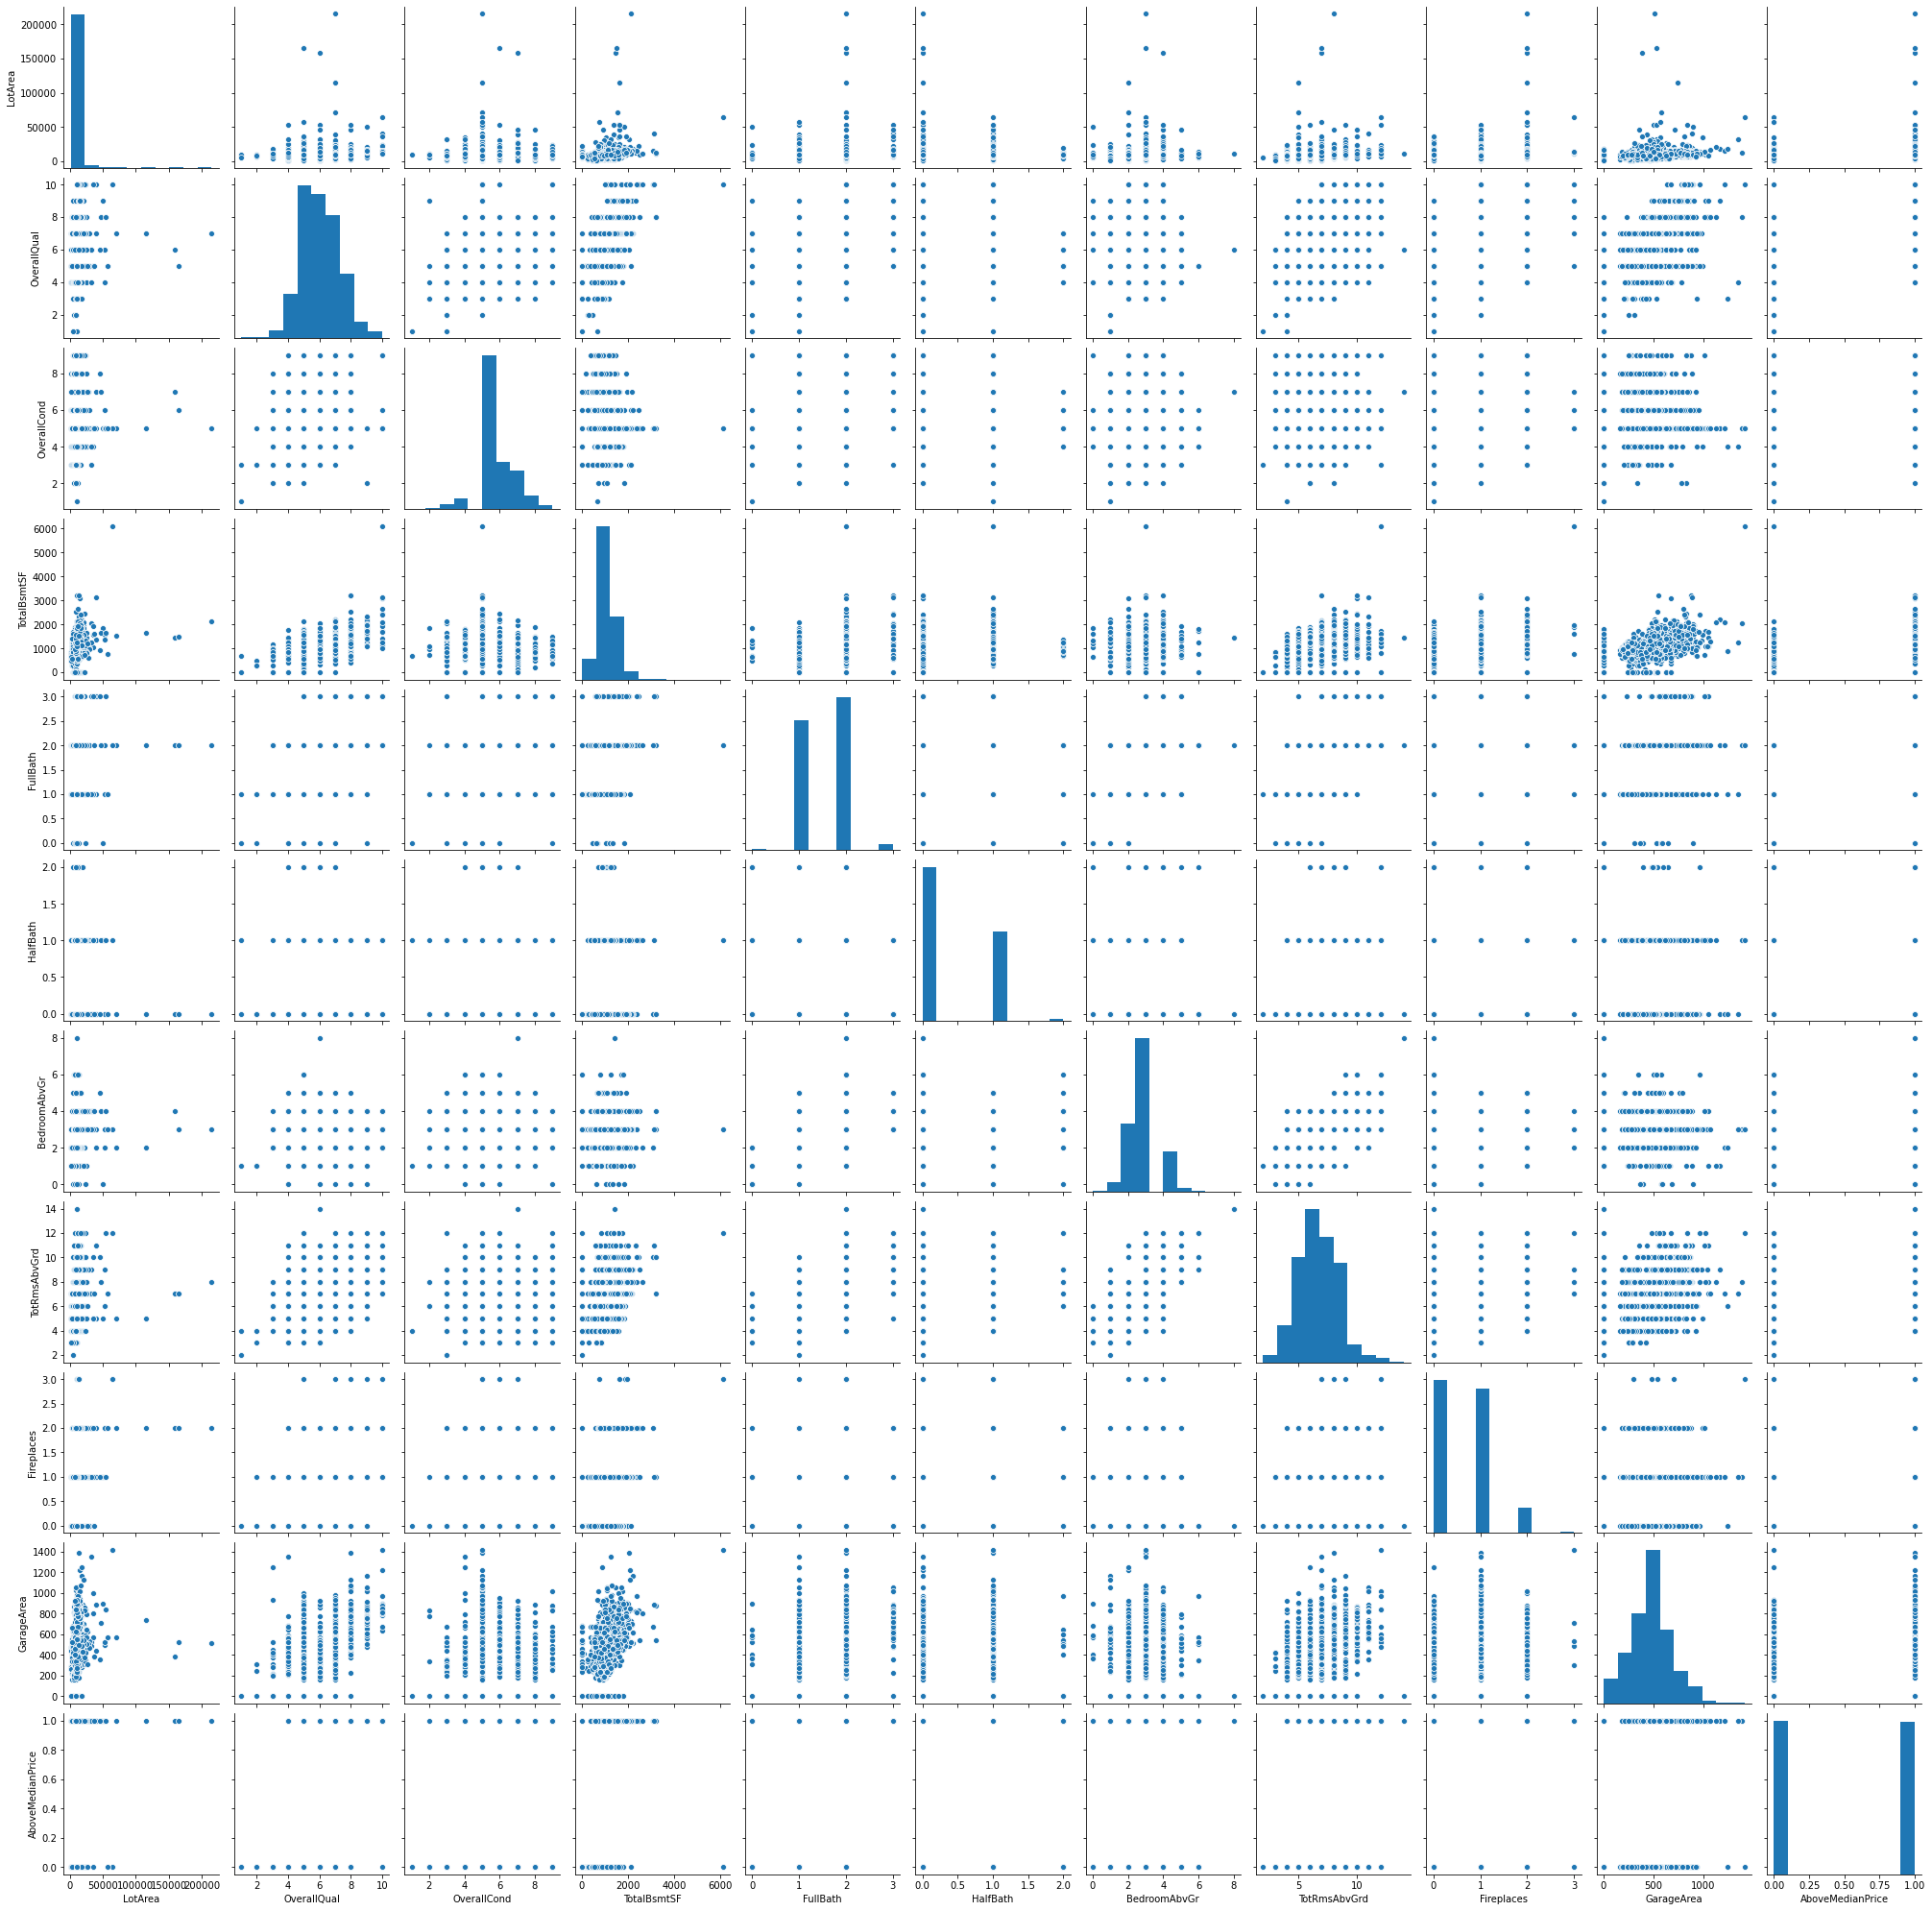

In [6]:
sns.pairplot(df)

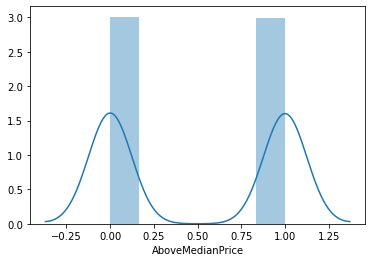

In [7]:
sns.distplot(df['AboveMedianPrice'])

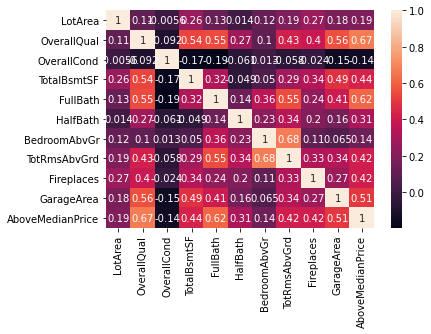

In [8]:
sns.heatmap(df.corr(), annot=True)

Converting the panda dataframe into array to simply access the values

In [9]:
dataset = df.values

dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]], dtype=int64)

Splitting the dataset into our input features and the label we wish to predict

In [10]:
X = dataset[:,0:10]
Y = dataset[:,10] 

Using min max scalar to scale our data between 0 and 1

In [11]:
from sklearn import preprocessing

In [12]:
scaler = preprocessing.MinMaxScaler()

In [13]:
X_scale = scaler.fit_transform(X)

In [14]:
X_scale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

Setting aside some parts of our dataset for a validation set and a test set


In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


# Building a Neural Network

In [19]:
import tensorflow

In [20]:
from tensorflow import keras

from tensorflow.keras.layers import Dense

from tensorflow.keras.models import Sequential

In [21]:
model = keras.Sequential([
    Dense(32, activation='relu', input_shape=(10,)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid'),
])

In [22]:
model.compile (optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [23]:
hist = model.fit (X_train, Y_train,
          batch_size=32, epochs=100,
          validation_data=(X_val, Y_val)) 

Epoch 1/100
32/32 [==============================] - 0s 6ms/step - loss: 0.2410 - accuracy: 0.5470 - val_loss: 0.2229 - val_accuracy: 0.6347
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.2233 - accuracy: 0.6644 - val_loss: 0.2005 - val_accuracy: 0.8037
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.2010 - accuracy: 0.8023 - val_loss: 0.1710 - val_accuracy: 0.9041
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1722 - accuracy: 0.8376 - val_loss: 0.1410 - val_accuracy: 0.8630
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1448 - accuracy: 0.8542 - val_loss: 0.1145 - val_accuracy: 0.8767
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.1252 - accuracy: 0.8581 - val_loss: 0.0984 - val_accuracy: 0.8950
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.8620 - val_loss: 0.0909 - val_accuracy: 0.8995
Epoch 8/100
3

32/32 [==============================] - 0s 1ms/step - loss: 0.0688 - accuracy: 0.9002 - val_loss: 0.0689 - val_accuracy: 0.8904
Epoch 57/100
32/32 [==============================] - 0s 976us/step - loss: 0.0675 - accuracy: 0.9110 - val_loss: 0.0626 - val_accuracy: 0.9132
Epoch 58/100
32/32 [==============================] - 0s 998us/step - loss: 0.0679 - accuracy: 0.9061 - val_loss: 0.0636 - val_accuracy: 0.9132
Epoch 59/100
32/32 [==============================] - 0s 997us/step - loss: 0.0696 - accuracy: 0.8992 - val_loss: 0.0622 - val_accuracy: 0.9087
Epoch 60/100
32/32 [==============================] - 0s 1ms/step - loss: 0.0673 - accuracy: 0.9061 - val_loss: 0.0613 - val_accuracy: 0.9087
Epoch 61/100
32/32 [==============================] - 0s 990us/step - loss: 0.0677 - accuracy: 0.9031 - val_loss: 0.0616 - val_accuracy: 0.9087
Epoch 62/100
32/32 [==============================] - 0s 976us/step - loss: 0.0673 - accuracy: 0.9061 - val_loss: 0.0675 - val_accuracy: 0.8995
Epoch 63/

In [24]:
model.evaluate(X_test, Y_test)[1]

7/7 [==============================] - 0s 570us/step - loss: 0.0564 - accuracy: 0.9315


0.931506872177124

# Evaluation

In [25]:
from sklearn.naive_bayes import MultinomialNB

In [26]:
nv=MultinomialNB()
nv.fit(X_train, Y_train)

MultinomialNB()

In [27]:
from sklearn.metrics import accuracy_score

In [28]:
y_pred = nv.predict(X_test)

In [29]:
accuracy_score(Y_test, y_pred)

0.7579908675799086

# Visualizing Loss and Accuracy

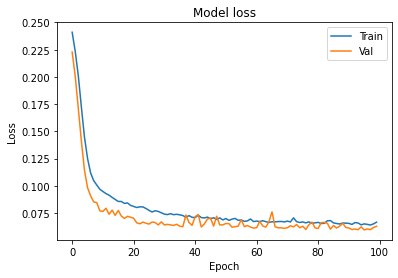

In [30]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

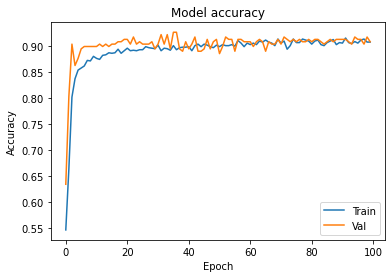

In [31]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()